In [49]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM , Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [102]:
#loading dataset of Netflix stock price
df = pd.read_csv("NFLX.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [103]:
df.shape

(1009, 7)

In [104]:
df['Date'] = pd.to_datetime(df['Date'])

In [105]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


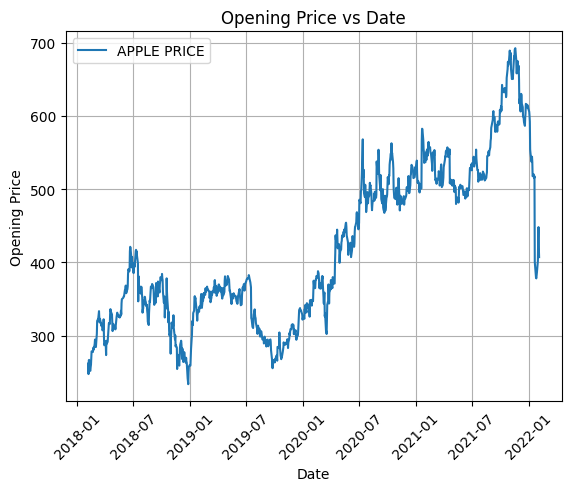

In [106]:
#opening price over time
plt.plot(df['Date'], df['Open'], label="APPLE PRICE")
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.title("Opening Price vs Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

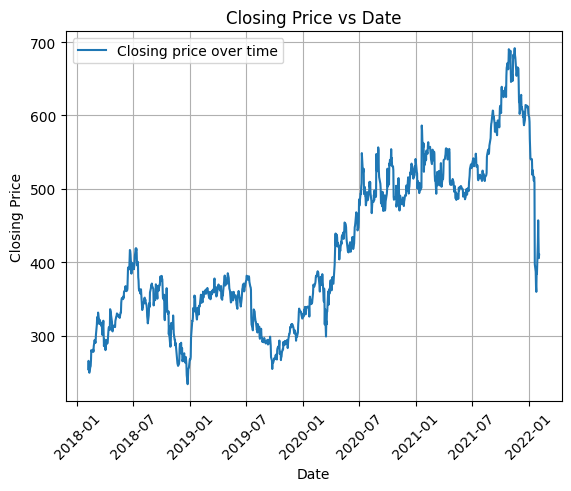

In [107]:
#Closing price overtime
plt.plot(df['Date'], df['Close'], label="Closing price over time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price vs Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
data = np.array(df['Open'])
data

array([262.      , 247.699997, 266.579987, ..., 448.25    , 421.440002,
       407.309998])

In [109]:
#normlaize the data using minmaxscaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(data.reshape(-1,1))
scaled_data

array([[0.06125254],
       [0.03005911],
       [0.07124314],
       ...,
       [0.46753051],
       [0.4090483 ],
       [0.3782257 ]])

In [157]:
#splitting the data to 80% for training AND 20% for testing
size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:size], scaled_data[size:]

In [158]:
# Define the sequence length (number of past time steps)
no_past_time_steps = 60
#for train data
x_train, y_train = [], []
for i in range(no_past_time_steps, len(train_data)):
    x_train.append(train_data[i - no_past_time_steps:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

#for test data
x_test, y_test = [], []
for i in range(no_past_time_steps, len(test_data)):
    x_test.append(test_data[i - no_past_time_steps:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [159]:
print(f"train size :{x_train.shape} \ntest size:{x_test.shape}")

train size :(747, 60) 
test size:(142, 60)


In [160]:
#reshaping the data  to 3D for LSTM 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(747, 60, 1)
(142, 60, 1)


In [114]:
#model

model = Sequential()

model.add(LSTM(units=256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))     

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=32))  
model.add(Dense(units=16))  
model.add(Dense(units=1))  #didn't include a Sigmoid activation function in the final layer because we are aiming to predict
#a continuous value (stock price) rather than a value constrained between 0 and 1.


C:\Users\ankur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 60, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_36 (LSTM)                       │ (None, 60, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513,345 (1.96 MB)

 Trainable params: 513,345 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
import tensorflow
model.compile(loss='mse', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.002) , metrics = [tensorflow.keras.metrics.RootMeanSquaredError()])

In [121]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Defining  callbacks
checkpoints = ModelCheckpoint(filepath = 'stock_model.keras', save_best_only = True)
# Defining  early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Training   model
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=32, verbose=2, callbacks= [checkpoints, early_stopping])

Epoch 1/100
24/24 - 21s - 883ms/step - loss: 0.0150 - root_mean_squared_error: 0.1223 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 2/100
24/24 - 15s - 638ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0872
Epoch 3/100
24/24 - 10s - 426ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0852
Epoch 4/100
24/24 - 8s - 338ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 5/100
24/24 - 9s - 373ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 6/100
24/24 - 10s - 436ms/step - loss: 0.0024 - root_mean_squared_error: 0.0492 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 7/100
24/24 - 10s - 404ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0985
E

In [165]:
#predicting on y_test
pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [166]:
pred=scaler.inverse_transform(pred)

In [163]:
y_test= scaler.inverse_transform(y_test.reshape(-1,1))

In [167]:
for i in range(len(pred)):
    print(f"{pred[i]} : {y_test[i]}")

[550.1192] : [541.809998]
[545.2393] : [526.049988]
[532.9693] : [526.070007]
[528.1894] : [526.130005]
[527.0168] : [510.209991]
[516.8917] : [512.159973]
[514.9973] : [514.380005]
[516.1009] : [518.080017]
[519.54877] : [521.820007]
[523.2774] : [519.960022]
[523.04706] : [512.690002]
[517.64484] : [519.]
[519.55597] : [514.390015]
[517.12085] : [513.]
[515.5483] : [517.130005]
[517.67926] : [524.]
[523.18207] : [521.150024]
[523.226] : [520.]
[522.23517] : [517.]
[519.50494] : [511.859985]
[515.07135] : [512.640015]
[514.1333] : [515.23999]
[515.8318] : [515.469971]
[516.9095] : [520.]
[520.376] : [522.73999]
[523.28864] : [545.090027]
[539.15155] : [545.97998]
[544.75696] : [551.47998]
[550.0296] : [550.159973]
[549.91223] : [546.159973]
[546.8873] : [551.599976]
[549.3297] : [557.25]
[554.1125] : [566.119995]
[562.04095] : [569.]
[566.6164] : [583.679993]
[577.8338] : [585.799988]
[582.3976] : [594.690002]
[589.7946] : [603.840027]
[597.65027] : [606.469971]
[601.8055] : [598.1599

In [168]:
#calculating RMSE
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,pred)))

16.330178838280542


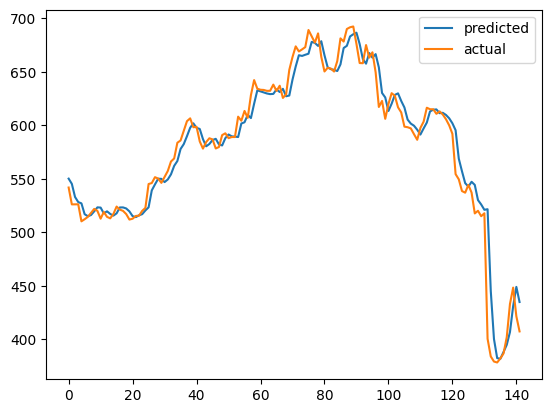

In [172]:
plt.plot(pred,label = "predicted")
plt.plot(y_test,label = "actual")
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

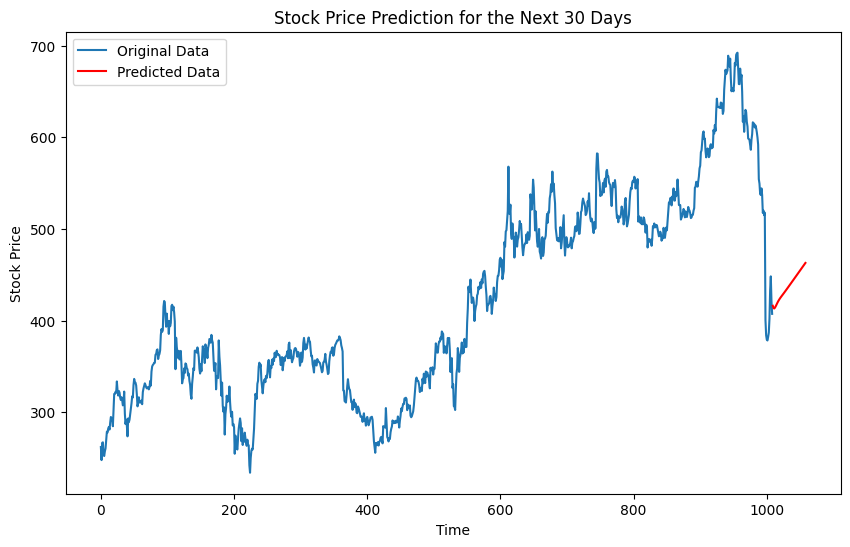

In [175]:
#next 50 days prediction 

last_60_days = df['Open'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

predicted_values = []

# Reshape 
x_input = last_60_days_scaled.reshape((1, last_60_days_scaled.shape[0], 1))

# Predict for the next 50 days
for _ in range(50):
    predicted_value = model.predict(x_input)
    predicted_values.append(predicted_value[0, 0])
    x_input = np.append(x_input[:, 1:, :], predicted_value.reshape((1, 1, 1)), axis=1)

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

predictions_df = pd.DataFrame(predicted_values, columns=['Predicted_Close'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Open'], label='Original Data')
plt.plot(np.arange(len(df), len(df) + len(predictions_df)), predictions_df, label='Predicted Data', color='red')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


<font size="5">**NOW DO THE SAME FOR CLOSING PRICES**</font>

In [176]:
data2 = np.array(df['Close'])
data2

array([254.259995, 265.720001, 264.559998, ..., 429.480011, 405.600006,
       410.170013])

In [177]:
#normlaize the data using minmaxscaler
scaler2 = MinMaxScaler()
scaled_data2=scaler2.fit_transform(data2.reshape(-1,1))
scaled_data2

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [178]:
#splitting the data to 80% for training AND 20% for testing
size = int(len(scaled_data) * 0.8)
train_data2, test_data2 = scaled_data2[:size], scaled_data2[size:]

In [179]:
# Define the sequence length (number of past time steps)
no_past_time_steps = 60
#for train data
x_train2, y_train2 = [], []
for i in range(no_past_time_steps, len(train_data2)):
    x_train2.append(train_data2[i - no_past_time_steps:i, 0])
    y_train2.append(train_data[i, 0])
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

#for test data
x_test2, y_test2 = [], []
for i in range(no_past_time_steps, len(test_data2)):
    x_test2.append(test_data2[i - no_past_time_steps:i, 0])
    y_test2.append(test_data2[i, 0])
x_test2, y_test2 = np.array(x_test2), np.array(y_test2)

In [180]:
#reshaping the data  to 3D for LSTM 
x_train2 = x_train2.reshape((x_train2.shape[0], x_train2.shape[1], 1))
x_test2 = x_test2.reshape((x_test2.shape[0], x_test2.shape[1], 1))
print(x_train2.shape)
print(x_test2.shape)

(747, 60, 1)
(142, 60, 1)


In [181]:
#model

model = Sequential()

model.add(LSTM(units=256, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model.add(Dropout(0.2))     

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=32))  
model.add(Dense(units=16))  
model.add(Dense(units=1))  #didn't include a Sigmoid activation function in the final layer because we are aiming to predict
#a continuous value (stock price) rather than a value constrained between 0 and 1.


C:\Users\ankur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [182]:
import tensorflow
model.compile(loss='mse', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.002) , metrics = [tensorflow.keras.metrics.RootMeanSquaredError()])

In [183]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Defining  callbacks
checkpoints = ModelCheckpoint(filepath = 'stock_model2.keras', save_best_only = True)
# Defining  early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Training   model
model.fit(x_train2, y_train2, validation_data=(x_test2,y_test2), epochs=100, batch_size=32, verbose=2, callbacks= [checkpoints, early_stopping])

Epoch 1/100
24/24 - 21s - 880ms/step - loss: 0.0346 - root_mean_squared_error: 0.1861 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1745
Epoch 2/100
24/24 - 16s - 670ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890
Epoch 3/100
24/24 - 9s - 368ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860
Epoch 4/100
24/24 - 9s - 357ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 5/100
24/24 - 9s - 367ms/step - loss: 0.0033 - root_mean_squared_error: 0.0574 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0837
Epoch 6/100
24/24 - 10s - 420ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777
Epoch 7/100
24/24 - 8s - 348ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0742
Epo

In [184]:
pred2 = model.predict(x_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step


In [185]:
pred2=scaler2.inverse_transform(pred2)

In [186]:
y_test2= scaler2.inverse_transform(y_test2.reshape(-1,1))

In [187]:
for i in range(len(pred2)):
    print(f"{pred2[i]} : {y_test2[i]}")

[542.7007] : [530.309998]
[532.06647] : [532.280029]
[531.9351] : [531.049988]
[531.2074] : [513.630005]
[517.346] : [511.769989]
[513.3731] : [515.409973]
[515.85504] : [516.48999]
[517.50104] : [518.909973]
[519.6997] : [519.299988]
[520.2387] : [514.25]
[516.1492] : [517.570007]
[518.0512] : [515.150024]
[516.4805] : [510.820007]
[512.7398] : [517.349976]
[517.3044] : [524.890015]
[524.2671] : [520.549988]
[521.87225] : [519.969971]
[520.7476] : [515.840027]
[517.0922] : [512.400024]
[513.7551] : [510.720001]
[511.8812] : [515.919983]
[515.868] : [517.919983]
[518.2359] : [518.909973]
[519.3568] : [521.869995]
[521.78064] : [543.710022]
[539.89185] : [546.880005]
[545.1465] : [553.330017]
[551.03375] : [553.409973]
[551.6353] : [547.580017]
[547.0711] : [550.119995]
[548.50604] : [558.919983]
[555.99695] : [566.179993]
[563.10535] : [569.190002]
[566.53827] : [582.070007]
[577.4203] : [588.549988]
[584.0202] : [590.530029]
[586.65546] : [606.710022]
[600.21234] : [606.049988]
[601.2

In [188]:
#calculating RMSE
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test2,pred2)))

15.801667683006505


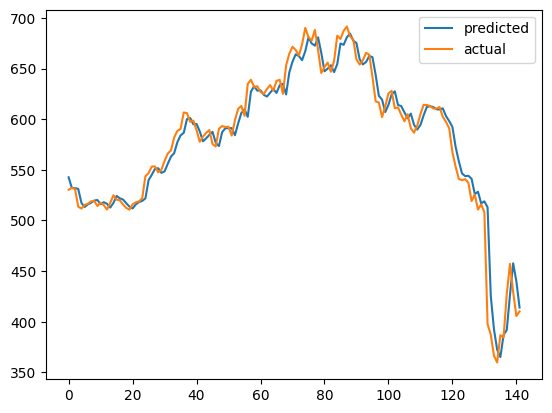

In [189]:
plt.plot(pred2,label = "predicted")
plt.plot(y_test2,label = "actual")
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

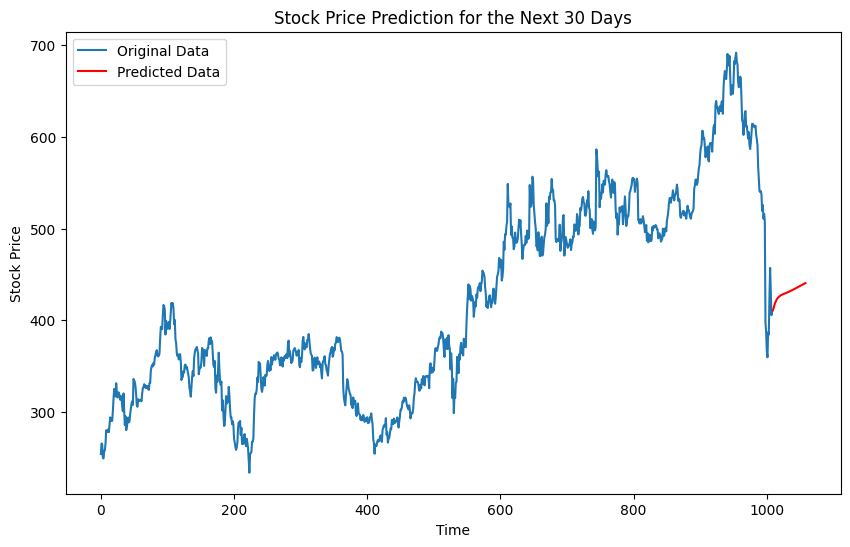

In [190]:
#next 50 days prediction 

last_60_days = df['Close'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

predicted_values = []

# Reshape 
x_input = last_60_days_scaled.reshape((1, last_60_days_scaled.shape[0], 1))

# Predict for the next 50 days
for _ in range(50):
    predicted_value = model.predict(x_input)
    predicted_values.append(predicted_value[0, 0])
    x_input = np.append(x_input[:, 1:, :], predicted_value.reshape((1, 1, 1)), axis=1)

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

predictions_df = pd.DataFrame(predicted_values, columns=['Predicted_Close'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Original Data')
plt.plot(np.arange(len(df), len(df) + len(predictions_df)), predictions_df, label='Predicted Data', color='red')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
